# Test CelebA DataModule

This notebook tests the CelebA DataModule implementation by loading the dataset and displaying some sample images.

In [1]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
import torch
from src.data.celeba_datamodule import CelebADataModule

## Initialize the DataModule

In [2]:
# Initialize the datamodule
datamodule = CelebADataModule(
    data_dir="../data",
    batch_size=32,
    image_size=64,
    num_workers=31
)

## Download and prepare the data

In [3]:
# This will download the dataset if it's not already downloaded
# datamodule.prepare_data()
datamodule.setup()

## Display sample images

In [4]:
def show_images(images, title=""):
    """Display a grid of images."""
    # Denormalize images
    images = images * 0.5 + 0.5  # Scale from [-1, 1] to [0, 1]
    
    # Create a grid of images
    grid_size = int(len(images) ** 0.5)
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(10, 10))
    axes = axes.ravel()
    
    for idx, img in enumerate(images):
        if idx >= len(axes):
            break
        # Convert from (C, H, W) to (H, W, C) for matplotlib
        img = img.permute(1, 2, 0).cpu().numpy()
        axes[idx].imshow(img)
        axes[idx].axis('off')
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

tensor([[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
         1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1],
        [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
         1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1],
        [0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
         1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
         1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 

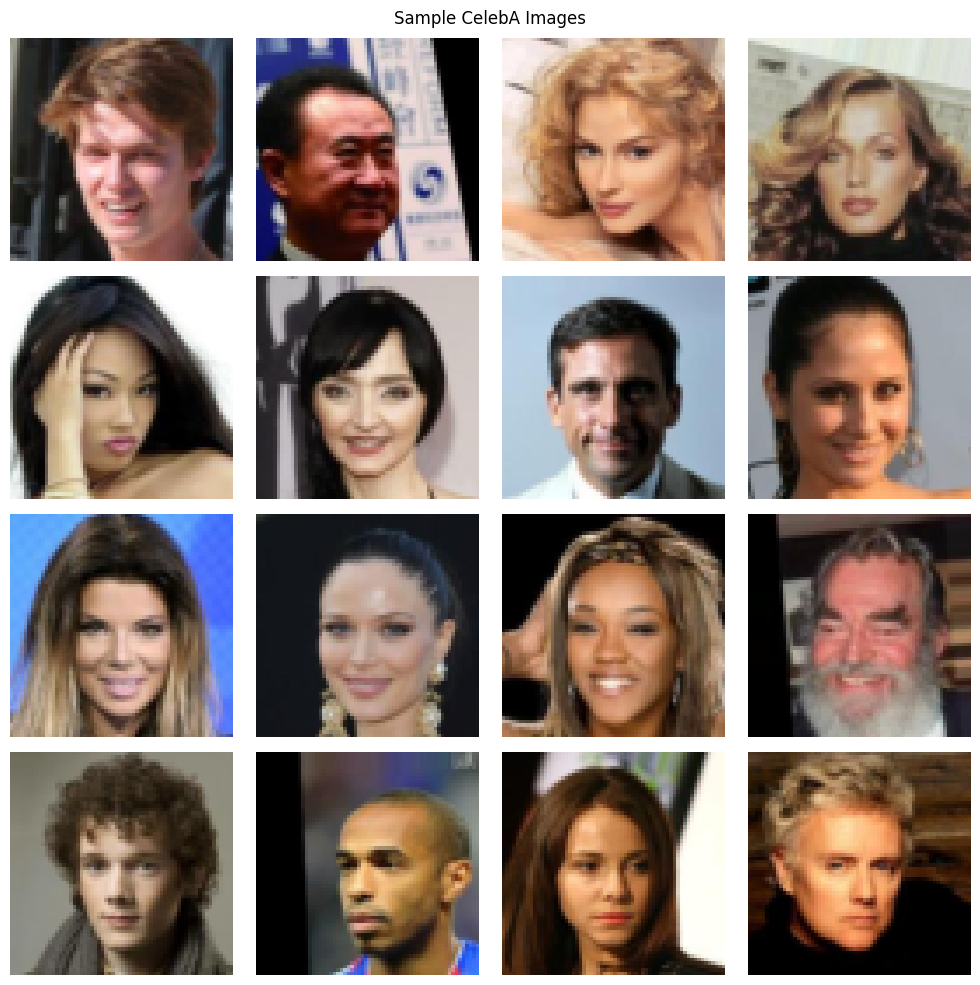

In [5]:
# Get a batch of training images
train_loader = datamodule.train_dataloader()
batch = next(iter(train_loader))
print(batch[1][:16])  # Should be a tuple (images, labels)

images = batch[0][:16]  # Get first 16 images from the batch

# Display the images
show_images(images, "Sample CelebA Images")

## Check dataset statistics

In [11]:
print(f"Number of training samples: {len(datamodule.data_train)}")
print(f"Number of validation samples: {len(datamodule.data_val)}")
print(f"Number of test samples: {len(datamodule.data_test)}")
print(f"Number of attributes: {datamodule.num_classes}")
print(f"Image size: {images[0].shape}")

Number of training samples: 1024
Number of validation samples: 0
Number of test samples: 0
Number of attributes: 40
Image size: torch.Size([3, 128, 128])


## Process txt files

In [10]:
# load all text files in data/celeba/ as pandas dataframes and print their names
import pandas as pd
import os
data_dir = "../data/celeba/"
text_files = [f for f in os.listdir(data_dir) if f.endswith('.txt')]
for file in text_files:
    df = pd.read_csv(os.path.join(data_dir, file))
    print(f"File: {file}, Shape: {df.shape}")
    print(df.head())  # Print the first few rows of each dataframe

File: README.txt, Shape: (0, 1)
Empty DataFrame
Columns: [THIS IS NOT THE COMPLETE CELEBA DATASET. ONLY THE FIRST 1024 IMAGES ARE PRESENT.]
Index: []
File: list_landmarks_align_celeba.txt, Shape: (202600, 1)
                                              202599
0  lefteye_x lefteye_y righteye_x righteye_y nose...
1  000001.jpg 69  109  106  113   77  142   73  1...
2  000002.jpg 69  110  107  112   81  135   70  1...
3  000003.jpg 76  112  104  106  108  128   74  1...
4  000004.jpg 72  113  108  108  101  138   71  1...
File: list_bbox_celeba.txt, Shape: (202600, 1)
                          202599
0  image_id x_1 y_1 width height
1   000001.jpg    95  71 226 313
2   000002.jpg    72  94 221 306
3   000003.jpg   216  59  91 126
4   000004.jpg   622 257 564 781
File: identity_CelebA.txt, Shape: (202598, 1)
   000001.jpg 2880
0  000002.jpg 2937
1  000003.jpg 8692
2  000004.jpg 5805
3  000005.jpg 9295
4  000006.jpg 4153
File: list_attr_celeba.txt, Shape: (202600, 1)
                      

In [12]:
# every file except list_eval_partition.txt and identity_celeba have headers, account for that. and ignore the readme. keep the processed dataframes
processed_files = [f for f in text_files if f not in ['list_eval_partition.txt', 'identity_CelebA.txt', 'README.txt']]
for file in processed_files:
    df = pd.read_csv(os.path.join(data_dir, file), header=1)  # Skip the first row which is a comment
    print(f"Processed File: {file}, Shape: {df.shape}")
    print(df.head())  # Print the first few rows of each dataframe

# for list_eval_partition.txt

Processed File: list_landmarks_align_celeba.txt, Shape: (202599, 1)
  lefteye_x lefteye_y righteye_x righteye_y nose_x nose_y leftmouth_x leftmouth_y rightmouth_x rightmouth_y
0  000001.jpg 69  109  106  113   77  142   73  1...                                                       
1  000002.jpg 69  110  107  112   81  135   70  1...                                                       
2  000003.jpg 76  112  104  106  108  128   74  1...                                                       
3  000004.jpg 72  113  108  108  101  138   71  1...                                                       
4  000005.jpg 66  114  112  112   86  119   71  1...                                                       
Processed File: list_bbox_celeba.txt, Shape: (202599, 1)
  image_id x_1 y_1 width height
0  000001.jpg    95  71 226 313
1  000002.jpg    72  94 221 306
2  000003.jpg   216  59  91 126
3  000004.jpg   622 257 564 781
4  000005.jpg   236 109 120 166
Processed File: list_attr_celeba.tx

In [13]:
# for list_eval_partition.txt and identity_CelebA.txt, only keep the first 1024 rows and write it back to the file
for file in ['list_eval_partition.txt', 'identity_CelebA.txt']:
    df = pd.read_csv(os.path.join(data_dir, file), header=None)
    df = df.head(1024)  # Keep only the first 1024 rows
    df.to_csv(os.path.join(data_dir, file), index=False, header=False)  # Write back without header
    print(f"Processed {file}, New Shape: {df.shape}")

Processed list_eval_partition.txt, New Shape: (1024, 1)
Processed identity_CelebA.txt, New Shape: (1024, 1)


In [14]:
# for the rest, except readme, keep the first 1024 rows and then write it back to the file
for file in processed_files:
    df = pd.read_csv(os.path.join(data_dir, file), header=1)  # Skip the first row which is a comment
    df = df.head(1024)  # Keep only the first 1024 rows
    # also write 1024 on a new line in the beginning of the file
    with open(os.path.join(data_dir, file), 'w') as f:
        f.write("1024\n")  # Write the number of rows at the top
    # Write the dataframe back to the file, make sure to append
    df.to_csv(os.path.join(data_dir, file), mode='a', index=False, header=True)  # Append without header
    # Print the shape of the processed dataframe
    print(f"Processed {file}, New Shape: {df.shape}")


Processed list_landmarks_align_celeba.txt, New Shape: (1024, 1)
Processed list_bbox_celeba.txt, New Shape: (1024, 1)
Processed list_attr_celeba.txt, New Shape: (1024, 1)
